# Assignment #4


# 1. Basics of Geostatistics (25 pts)

Each observation of an environmental variable in space $z(\mathbf{x})$ can be interpreted as a single realization of a random variable $Z(\mathbf{x})$. Where $\mathbf{x}$ denotes the position in space of the observation. In a given finite region there can be an infinite number of locations $\mathbf{x}$ and thus an infinite number of random variables $Z(\mathbf{x})$. The set of all these random variables $Z(\mathbf{x})$ constitutes a random process. For the remainder of this problem assume $Z_i = Z(\mathbf{x})$ and $z_i = z(\mathbf{x})$.

A. Explain the difference between $z_i$ and $Z_i$.

B. Based on the lectures, define $Z^*$ and $Z_0$. Explain the difference between the two. 

C. Describe the meaning of $\text{Cov}(Z_i,Z_j)$, $\text{Cov}(Z_i,Z_0)$, $\text{Var}(Z_0)$.

D. The Simple Kriging system is given by $\Sigma \mathbf{w} = \mathbf{c}$. Explain each term in that equation.

E. Once $\mathbf{w}$ is computed, how can it be used to estimate $z^*$? 

F. What is second-order stationarity?

G. Assuming second-order stationarity, if we are interested in the covariance between $Z_i$ and $Z_j$, why do we concern ourselves with the semivariogram?

H. Starting from the definition of covariance, derive the relationship between covariance and semivariogram. 

> **A.**
>
> $z_i$ is the observed or measured value of the environment variable at location $x_i$. It is a fixed value that is collected on the field. On the other hand, $Z_i$ is the random variable that is associated with the location $x_i$. It represents all the possible values that could occur at that location with certain probabilities. So, in a way, $z_i$ is one observed value of $Z_i$.

> **B.**
>
> $Z_0$ is the random variable at an unsampled location $x_0$ where we want to make a prediction. It represents the true but unknown value at the location. 
> $Z*$ is the estimator of of $Z_0$. In Kriging, $Z*$ is defined as a weighted linear combination of observed values: $Z* = \sum_{i=1}^{N} w_i Z_i$, where $w_i$ are the kriging weights.
>
> The difference between the two is that $Z_0$ is the true value we are trying to estimate, while $Z*$ is our prediction of that value based on nearby observations.

> **C.**
>
> $Cov(Z_i, Z_j)$ is the covariance between random variables at two sampled locations $x_i$ and $x_j$. It measures how much the values at these two locations tend to vary together. In the context of geostatistics, this typically depends on the distance between the locations. Under second order stationarity, this depends only on the separation distance $h = ||x_i - x_j||$ and can be expressed as $Cov(Z_i, Z_j) = C(h)$.
>
> $Cov(Z_i, Z_0)$ is the covariance between a sampled location $x_i$ and the unsampled location $x_0$. It measures how related the observed value at $x_i$ is to the unknown value at $x_0$, which is crucial for making predictions.
>
> $Var(Z_0)$ is the variance at the unsampled location $x_0$. It represents the spread or uncertainty of possible values at that location before we use any nearby observations to make a prediction. Under second order stationarity, this equals the variance at any location $Var(Z_0) = \sigma^2 = C(O)$.

> **D.**
>
> In the equation $\sum w = c$, we have a system of linear equations for kriging:
> - $\sum$ (sigma) is the $NxN$ covariance matrix which contains all $Cov(Z_i, Z_j)$ values between sampled locations.
> - $w$ is the $Nx1$ vector of kriging weights ($w_1$, $w_2$, ..., $w_N$)$^T$ that we are solving for,
> - $c$ is the $Nx1$ vector of covariances between each sampled location and the target location: [$Cov(Z_1, Z_0)$, $Cov(Z_2, Z_0)$, ..., $Cov(Z_n, Z_0)$]
>
> This system is derived by minimizing the mean squared error $Var(Z* - Z_0)$.

> **E.**
>
> Once the weight vector $w$ is computed by solving the kriging system, the value at the unsampled location $z$ can be estimated using simple kriging which assumes known mean $\mu$:
> 1. Subtract the mean from observations: $z_t = z_i - \mu$
> 2. Compute $z = \sigma(w_i x z_t,i) = w^T z_t*)$
> 3. Add the mean back: $y = z + \mu**$
> 
>The weights account for both the distance to the target location and the spatial correlation structure among observations.

> **F.** 
> 
> Second-order stationarity means that the mean is constant across the entire study region. That is, $E[Z(x)] = \mu$ fot all locations $x$.This means that the mean is spatially invariant.
>
> It also means that the covariance between any two locations depends only on their separation vector which is distance and direction, and not on their absolute positions. That is, $Cov(Z(x), Z(x+h)) = C(h)$.
> 
> This means that the spatial correlation structure is the same everywhere in the region.

> **G.**
>
> Under second-order stationarity, the semivariogram $\gamma(h)$ and covariance function $C(h)$ are directly related as $\gamma(h) = C(0) - C(h) = Var(Z) - Cov(Z_i, Z_j)$.
>
> The semivariogram can be estimated directly from the data without knowing the mean $\mu$.
> The covariance between $Z_i$ and $Z_j$ can be easily computed as $Cov(Z_i, Z_j) = C(O) - \gamma(h_ij)$. 
> It provides a more robust estimation method in practice.
> Once a model semivariogram is fit, we can immediately obtain the covariance function needed for kriging as $C(h) = C(O) - \gamma(h)$.

> **H.**
>
> The definition of semivariogram is as follows:
>
> $$\gamma = \frac{1}{2}E[(Z_i - Z_j)^2]$$
>
> Expanding, we get:
>
> $$\begin{align*}
> \gamma &= \frac{1}{2}E[Z_i^2 - 2Z_iZ_j + Z_j^2]\\
> &= \frac{1}{2}[E[Z_i^2] + E[Z_j^2] - 2E[Z_iZ_j]]
> \end{align*}$$
>
> From the definition of covariance:
>
> $$\text{Cov}(Z_i, Z_j) = E[Z_iZ_j] - E[Z_i]E[Z_j]$$
> 
> Therefore: 
>
> $$E[Z_iZ_j] = \text{Cov}(Z_i, Z_j) + E[Z_i]E[Z_j]$$
> 
> Substituting back:
>
> $$\gamma = \frac{1}{2}[E[Z_i^2] + E[Z_j^2] - 2\text{Cov}(Z_i, Z_j) - 2E[Z_i]E[Z_j]]$$
> 
> Under second-order stationarity, $E[Z_i] = E[Z_j] = \mu$, so:
>
> $$\begin{align*}
> \gamma &= \frac{1}{2}[E[Z_i^2] - E[Z_i]^2 + E[Z_j^2] - E[Z_j]^2 - 2\text{Cov}(Z_i, Z_j)]\\
> &= \frac{1}{2}[\text{Var}(Z_i) + \text{Var}(Z_j)] - \text{Cov}(Z_i, Z_j)
> \end{align*}$$
>
> Since $\text{Var}(Z_i) = \text{Var}(Z_j) = \text{Var}(Z)$ under stationarity:
>
> $$\gamma = \text{Var}(Z) - \text{Cov}(Z_i, Z_j)$$
>
> Therefore:
>
> $$\gamma(h) = C(0) - C(h)$$
> 
> or equivalently: 
>
> $$C(h) = C(0) - \gamma(h)$$
> 
> For the exponential model:
>
> - Semivariogram: $\gamma(h) = c\left(1 - \exp\left(-\frac{h}{\tau}\right)\right)$
> - Covariance: $C(h) = c \cdot \exp\left(-\frac{h}{\tau}\right)$
> 
> where $c = \sigma^2 = C(0) = \text{Var}(Z)$ is the sill.

# 2. Computing the semivariogram (25 pts)

Using data from the samples group in `/data/HW/HW4/HW4.nc`:

A. Assemble the isotropic cloud semivariogram. Plot the results. Only consider distances up to 25000 m. 

B. Having computed the cloud semivariogram, assemble the sample semivariogram using a bin size of 500 m. Plot the results. Only consider distances up to 25000 m.

C. Fit an exponential, spherical, and bounded linear semivariogram to the sample semivariogram. Compute the $R^2$ of each fit then plot the results. Remember to set bounds for the curve fitting, if not it won't converge. Based on your results, which model semivariogram would you use for the region?

In [1]:
# importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import scipy.optimize
from sklearn.metrics import r2_score

In [2]:
# loading the data
fp = xr.open_dataset('/data/HW/HW4/HW4.nc', group = 'samples')
fp

<xarray.Dataset>
Dimensions:  (n: 1396)
Dimensions without coordinates: n
Data variables:
    x        (n) float64 ...
    y        (n) float64 ...
    sand     (n) float64 ...

In [3]:
# extracting the coordinates and values
x_points = np.array(fp['x'])
y_points = np.array(fp['y'])
z_points = np.array(fp['sand'])

fp.close()

print(f"The number of sample points are {len(z_points)}")
print(f"The data range is {z_points.min():.2f} to {z_points.max():.2f}")

The number of sample points are 1396
The data range is 6.50 to 26.14


#### Part A: Assemble the isotropic cloud semivariogram

In [4]:
# computing the euclidean distances between all pairs of points
h = np.sqrt((x_points[:, np.newaxis] - x_points[np.newaxis, :])**2 +
           (y_points[:, np.newaxis] - y_points[np.newaxis, :])**2)

# computing the cloud semivariogram
gamma_c = (z_points[:, np.newaxis] - z_points[np.newaxis, :])**2 /2

In [5]:
# reshaping to 1D arrays
h = h.reshape(h.size)
gamma_c = gamma_c.reshape(gamma_c.size)

In [6]:
# filtering to only distances upto 25000m
mask = h <= 25000
h_filtered = h[mask]
gamma_c_filtered = gamma_c[mask]

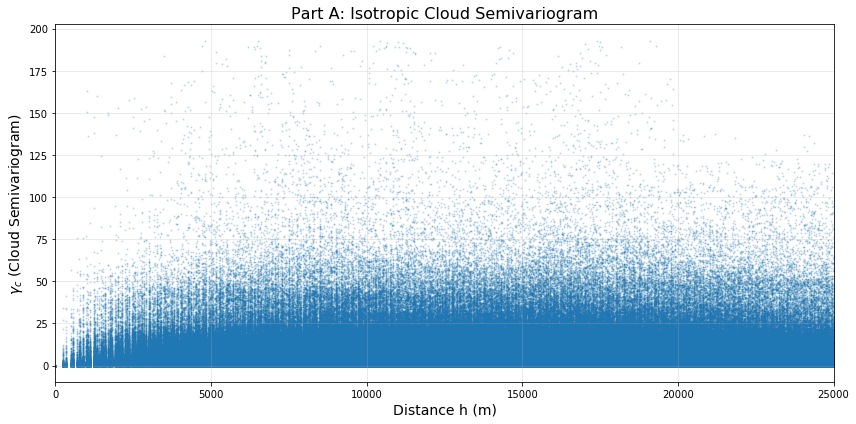

In [7]:
# plotting the cloud semivariogram
plt.figure(figsize = (12, 6))
plt.scatter(h_filtered, gamma_c_filtered, alpha = 0.1, s = 1)
plt.xlim([0, 25000])
plt.xlabel('Distance h (m)', fontsize = 14)
plt.ylabel(r'$\gamma_c$ (Cloud Semivariogram)', fontsize = 14)
plt.title('Part A: Isotropic Cloud Semivariogram', fontsize = 16)
plt.grid(True, alpha = 0.3)
plt.tight_layout()
plt.show()

In [8]:
print(f"Cloud semivariogram has {len(h_filtered)} point pairs.")

Cloud semivariogram has 1682854 point pairs.


#### Part B: Assembling the sample semivariogram with 500m bin size

In [9]:
# bin size in meters
delta = 500

# defining the bin edges
bin_edges = np.arange(0, 25000 + delta, delta)

# computing the bin centers
h_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

In [10]:
# computing sample semivariogram for each bin
gamma_sample = []
h_sample = []

for i in range(len(bin_edges) - 1):
    if i == 0:
        mask_bin = (h_filtered >= bin_edges[i]) & (h_filtered < bin_edges[i+1])
    else:
        mask_bin = (h_filtered > bin_edges[i]) & (h_filtered <= bin_edges[i+1])
    
    if np.sum(mask_bin) >= 2:
        gamma_sample.append(np.mean(gamma_c_filtered[mask_bin]))
        h_sample.append(h_centers[i])

gamma_sample = np.array(gamma_sample)
h_sample = np.array(h_sample)

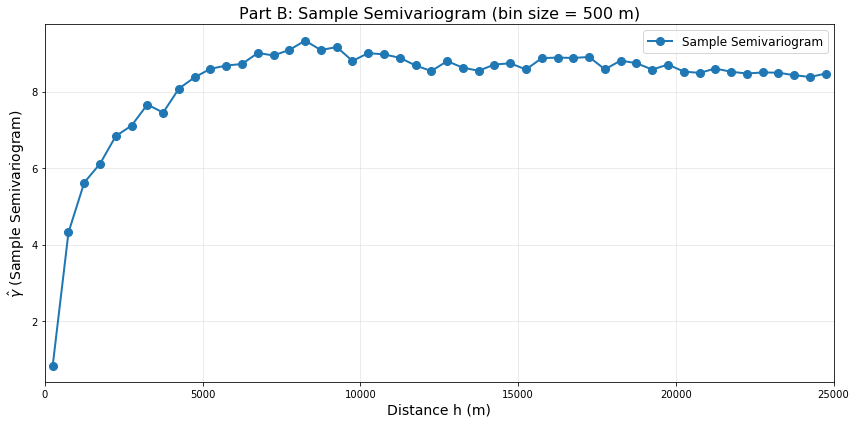

In [11]:
# plotting the sample semivariogram
plt.figure(figsize = (12, 6))
plt.plot(h_sample, gamma_sample, 'o-', markersize = 8, linewidth = 2, label = 'Sample Semivariogram')
plt.xlim([0, 25000])
plt.xlabel('Distance h (m)', fontsize=14)
plt.ylabel(r'$\hat{\gamma}$ (Sample Semivariogram)', fontsize=14)
plt.title('Part B: Sample Semivariogram (bin size = 500 m)', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### Part C: Fitting exponential, spherical, and bounded linear models

In [12]:
# defining the semivariogram models
def exponential_semivariogram(h, c, a):
    return c * (1 - np.exp(-h / a))

def spherical_semivariogram(h, c, a):
    h = np.array(h)
    out = np.zeros_like(h)
    inside = h <= a
    out[inside] = c * (1.5*(h[inside]/a) - 0.5*(h[inside]/a)**3)
    out[h > a] = c
    return out

def bounded_linear_semivariogram(h, c, a):
    h = np.array(h)
    out = np.minimum(c * (h / a), c)
    return out

In [13]:
# fitting each model using curve_fit
bounds = ([0, 1], [100, 30000])

popt_exp, _ = scipy.optimize.curve_fit(exponential_semivariogram, h_sample, gamma_sample,
                                       p0=[10, 5000], bounds=bounds)

popt_sph, _ = scipy.optimize.curve_fit(spherical_semivariogram, h_sample, gamma_sample,
                                       p0=[10, 5000], bounds=bounds)

popt_lin, _ = scipy.optimize.curve_fit(bounded_linear_semivariogram, h_sample, gamma_sample,
                                       p0=[10, 5000], bounds=bounds)

In [14]:
# computing the fitted curves
gamma_exp = exponential_semivariogram(h_sample, *popt_exp)
gamma_sph = spherical_semivariogram(h_sample, *popt_sph)
gamma_lin = bounded_linear_semivariogram(h_sample, *popt_lin)

In [15]:
# computing the R² values
r2_exp = r2_score(gamma_sample, gamma_exp)
r2_sph = r2_score(gamma_sample, gamma_sph)
r2_lin = r2_score(gamma_sample, gamma_lin)

In [16]:
print("Model Fit R² Values:")
print(f"Exponential: {r2_exp:.4f}")
print(f"Spherical: {r2_sph:.4f}")
print(f"Bounded Linear: {r2_lin:.4f}")

Model Fit R² Values:
Exponential: 0.9595
Spherical: 0.8987
Bounded Linear: 0.8502


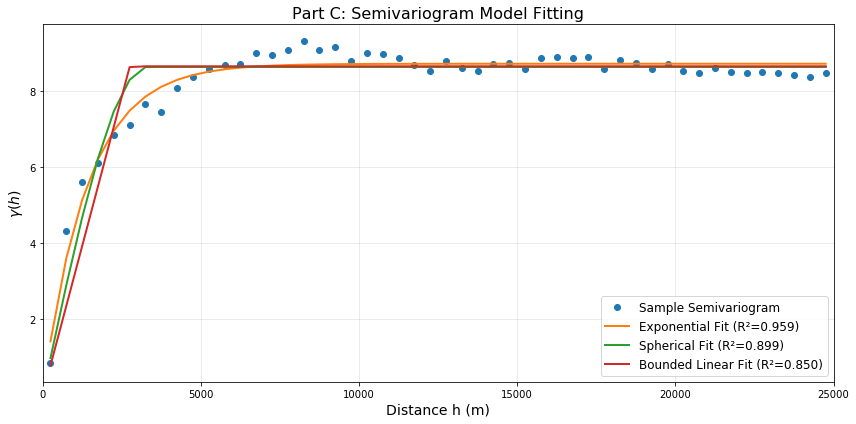

In [17]:
# plotting the results
plt.figure(figsize=(12, 6))
plt.plot(h_sample, gamma_sample, 'o', label='Sample Semivariogram', markersize=6)

plt.plot(h_sample, gamma_exp, '-', label=f'Exponential Fit (R²={r2_exp:.3f})', linewidth=2)
plt.plot(h_sample, gamma_sph, '-', label=f'Spherical Fit (R²={r2_sph:.3f})', linewidth=2)
plt.plot(h_sample, gamma_lin, '-', label=f'Bounded Linear Fit (R²={r2_lin:.3f})', linewidth=2)

plt.xlim([0, 25000])
plt.xlabel('Distance h (m)', fontsize=14)
plt.ylabel(r'$\gamma(h)$', fontsize=14)
plt.title('Part C: Semivariogram Model Fitting', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

> Three models were fit to the sample semivariogram derived in Part B. Their respective R² values were:
> - Exponential Model: R² = 0.9595
> - Spherical Model: R² = 0.8987
> - Bounded Linear Model: R² = 0.8502
>
> Among these three models, the exponential semivariogram provides the best fit. This form captures the continuous, asymptotic approach to the sill, which is consistent with the sample data's tendency to increase smoothly with distance and stabilize after roughly 5000-7000m.
>
> The spherical model performs moderately well but slightly underestimates the semivariogram at medium distances and reaches the sill too abruptly. This mismatch suggests that spatial correlation in the dataset decays more gradually than the spherical model allows.
>
> The bounded linear model is the worst out of the three. This is likely because its piecewise linear rise cannot capture the curvature present in the empirical semivariogram.
>
> Overall, based on both the statistical performance and the visual agreement with the empirical pattern, the exponential model is the most appropriate semivariogram for this region.

# 3. Ordinary Kriging (25 pts)

Using the data in the samples group in '/data/HW/HW4/HW4.nc', and assumming an exponential semivariogram with a sill ($c$) of 10.0 $\%^2$, a nugget of 0, and a range ($a$) of 1500 m, do the following:

A. Use ordinary kriging to try to reproduce the original map of sand (as found in the original_data group in `/data/HW/HW4/HW4.nc`).

B. Plot the reproduced map and the original map. Compare the two via the $R^2$.

C. Compute the estimated mean squared error at each grid cell (kriging variance) and plot the map. Discuss the results. 

D. One of the largest limitations of Kriging is that the observation covariance matrix can become too large. Another more practical approach is to only use the closest $n$ points to each point to which we interpolate. Setting $n = 10$, perform this "localized" ordinary kriging and compare the results to those from part B. 

E. Repeat part D. However, this time set $n=1$. What other deterministic spatial interpolation method does this now mimic?

In [18]:
# importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from sklearn.metrics import r2_score
from scipy.spatial import cKDTree

In [19]:
# loading sample points
print("Loading sample data...")
fp_samples = xr.open_dataset('/data/HW/HW4/HW4.nc', group='samples')
x_points = np.array(fp_samples['x'])
y_points = np.array(fp_samples['y'])
z_points = np.array(fp_samples['sand'])
fp_samples.close()

print(f"Sample points: {len(z_points)}")
print(f"X range: {x_points.min():.2f} to {x_points.max():.2f}")
print(f"Y range: {y_points.min():.2f} to {y_points.max():.2f}")
print(f"Sand range: {z_points.min():.2f} to {z_points.max():.2f}")

Loading sample data...
Sample points: 1396
X range: -12996.01 to 13003.99
Y range: -16463.36 to 16536.64
Sand range: 6.50 to 26.14


In [20]:
# loading original data
print("Loading original data...")
fp_original = xr.open_dataset('/data/HW/HW4/HW4.nc', group='original_data')
sand_original = np.array(fp_original['sand'])
print(f"Sand data shape: {sand_original.shape}")

# Get coordinates
if 'x' in fp_original.coords:
    x_grid = np.array(fp_original.coords['x'])
    y_grid = np.array(fp_original.coords['y'])
elif 'x' in fp_original.data_vars:
    x_grid = np.array(fp_original['x'])
    y_grid = np.array(fp_original['y'])

print(f"X grid shape: {x_grid.shape}, range: {x_grid.min():.2f} to {x_grid.max():.2f}")
print(f"Y grid shape: {y_grid.shape}, range: {y_grid.min():.2f} to {y_grid.max():.2f}")
fp_original.close()

Loading original data...
Sand data shape: (133, 105)
X grid shape: (105,), range: -12996.01 to 13003.99
Y grid shape: (133,), range: -16463.36 to 16536.64


In [21]:
# setting up the kriging parameters
c_sill = 10.0      # sill in %^2
nugget = 0.0       # nugget
a_range = 1500.0   # range in meters

# for exponential covariance: C(h) = c * exp(-h/τ)
tau = a_range
var = c_sill

In [22]:
# creating a grid for Kriging
if sand_original.ndim == 2:
    print(f"Data is 2D grid with shape: {sand_original.shape}")
    print(f"Shape interpretation: ({len(x_grid)} x {len(y_grid)})")
    
    # Check which dimension is which
    if sand_original.shape[0] == len(x_grid) and sand_original.shape[1] == len(y_grid):
        print("Grid is organized as: sand_original[x_index, y_index]")
        X_grid, Y_grid = np.meshgrid(x_grid, y_grid, indexing='ij')
    elif sand_original.shape[0] == len(y_grid) and sand_original.shape[1] == len(x_grid):
        print("Grid is organized as: sand_original[y_index, x_index]")
        X_grid, Y_grid = np.meshgrid(x_grid, y_grid, indexing='xy')
    else:
        print(f"WARNING: Shape mismatch!")
        X_grid, Y_grid = np.meshgrid(x_grid, y_grid, indexing='ij')
    
    x_target = X_grid.flatten()
    y_target = Y_grid.flatten()
    sand_original_flat = sand_original.flatten()
    
elif sand_original.ndim == 1:
    print(f"Data is 1D with shape: {sand_original.shape}")
    x_target = x_grid
    y_target = y_grid
    sand_original_flat = sand_original

print(f"Target grid points: {len(x_target)}")
print(f"Original data points: {len(sand_original_flat)}")

Data is 2D grid with shape: (133, 105)
Shape interpretation: (105 x 133)
Grid is organized as: sand_original[y_index, x_index]
Target grid points: 13965
Original data points: 13965


#### Part A: Ordinary Kriging to reproduce the original map

In [23]:
def ordinary_kriging(x_obs, y_obs, z_obs, x_target, y_target, var, tau):
    """
    Perform ordinary kriging
    
    For Ordinary Kriging, we solve:
    [Σ   1] [w]   [c]
    [1^T 0] [μ] = [1]
    
    where:
    - Σ is the covariance matrix between observations
    - c is the covariance vector between observations and target
    - w are the weights
    - μ is the Lagrange multiplier
    
    Parameters:
    x_obs, y_obs, z_obs : observation coordinates and values
    x_target, y_target : target grid coordinates (flattened)
    var : variance (sill)
    tau : range parameter
    
    Returns:
    z_pred : predicted values at target locations
    mse : mean squared error at each target location
    weights : kriging weights matrix
    """
    n_obs = len(x_obs)
    n_target = len(x_target)
    
    # computing the covariance matrix Sigma between all observations
    # using exponential covariance: C(h) = c * exp(-h/τ)
    dist_obs = np.sqrt((x_obs[:, np.newaxis] - x_obs[np.newaxis, :])**2 + 
                       (y_obs[:, np.newaxis] - y_obs[np.newaxis, :])**2)
    Sigma = var * np.exp(-dist_obs / tau)
    
    # creating augmented system with Lagrange multiplier
    # this enforces the unbiasedness constraint: sum(weights) = 1
    Sigma_aug = np.zeros((n_obs + 1, n_obs + 1))
    Sigma_aug[:n_obs, :n_obs] = Sigma
    Sigma_aug[n_obs, :n_obs] = 1
    Sigma_aug[:n_obs, n_obs] = 1
    Sigma_aug[n_obs, n_obs] = 0
    
    
    # computing covariances to target points
    dist_target = np.sqrt((x_obs[:, np.newaxis] - x_target[np.newaxis, :])**2 + 
                          (y_obs[:, np.newaxis] - y_target[np.newaxis, :])**2)
    C = var * np.exp(-dist_target / tau)
    
    # creating augmented RHS
    C_aug = np.zeros((n_obs + 1, n_target))
    C_aug[:n_obs, :] = C
    C_aug[n_obs, :] = 1
    
    # solving for weights: Sigma_aug * W = C_aug
    W = np.linalg.solve(Sigma_aug, C_aug)
    
    # extracting weights and Lagrange multiplier
    weights = W[:n_obs, :]
    lagrange = W[n_obs, :]
    
    # computing predictions: z* = sum(weights * z_obs)
    z_pred = np.sum(weights * z_obs[:, np.newaxis], axis=0)
    
    # computing kriging variance: MSE = var - sum(weights * c) - lagrange
    mse = var - np.sum(weights * C, axis=0) - lagrange
    
    return z_pred, mse, weights

In [24]:
# performing Ordinary Kriging
print("Performing Ordinary Kriging...")

z_pred, mse, weights = ordinary_kriging(x_points, y_points, z_points, 
                                        x_target, y_target, var, tau)

Performing Ordinary Kriging...


In [25]:
# reshaping back to grid
if sand_original.ndim == 2:
    z_pred_grid = z_pred.reshape(sand_original.shape)
    mse_grid = mse.reshape(sand_original.shape)
else:
    z_pred_grid = z_pred
    mse_grid = mse

In [26]:
print("Ordinary Kriging completed!")
print(f"Prediction range: {z_pred.min():.2f} to {z_pred.max():.2f}")
print(f"Original range: {sand_original_flat.min():.2f} to {sand_original_flat.max():.2f}")

Ordinary Kriging completed!
Prediction range: 6.50 to 26.14
Original range: 6.50 to 26.50


#### Part B: Plot and compare

In [27]:
# calculating R²
mask = ~(np.isnan(sand_original_flat) | np.isnan(z_pred))
r2 = r2_score(sand_original_flat[mask], z_pred[mask])

print(f"Ordinary Kriging R²: {r2:.6f}")

# print statistics
print(f"Prediction statistics:")
print(f"Min: {z_pred.min():.2f}")
print(f"Max: {z_pred.max():.2f}")
print(f"Mean: {z_pred.mean():.2f}")
print(f"Std: {z_pred.std():.2f}")

print(f"\nOriginal statistics:")
print(f"Min: {sand_original_flat.min():.2f}")
print(f"Max: {sand_original_flat.max():.2f}")
print(f"Mean: {sand_original_flat.mean():.2f}")
print(f"Std: {sand_original_flat.std():.2f}")

Ordinary Kriging R²: 0.610655
Prediction statistics:
Min: 6.50
Max: 26.14
Mean: 14.31
Std: 2.46

Original statistics:
Min: 6.50
Max: 26.50
Mean: 14.31
Std: 2.91


In [28]:
# determining the extent and orientation for plotting
if sand_original.ndim == 2:
    extent = [x_grid.min(), x_grid.max(), y_grid.min(), y_grid.max()]
    
    # checking if we need to transpose for plotting
    if sand_original.shape[0] == len(y_grid) and sand_original.shape[1] == len(x_grid):
        # standard orientation: rows=y, cols=x
        z_pred_grid_plot = z_pred_grid
        sand_original_plot = sand_original
    elif sand_original.shape[0] == len(x_grid) and sand_original.shape[1] == len(y_grid):
        # transposed: need to transpose for plotting
        z_pred_grid_plot = z_pred_grid.T
        sand_original_plot = sand_original.T
    else:
        z_pred_grid_plot = z_pred_grid
        sand_original_plot = sand_original
else:
    extent = None
    z_pred_grid_plot = z_pred_grid
    sand_original_plot = sand_original

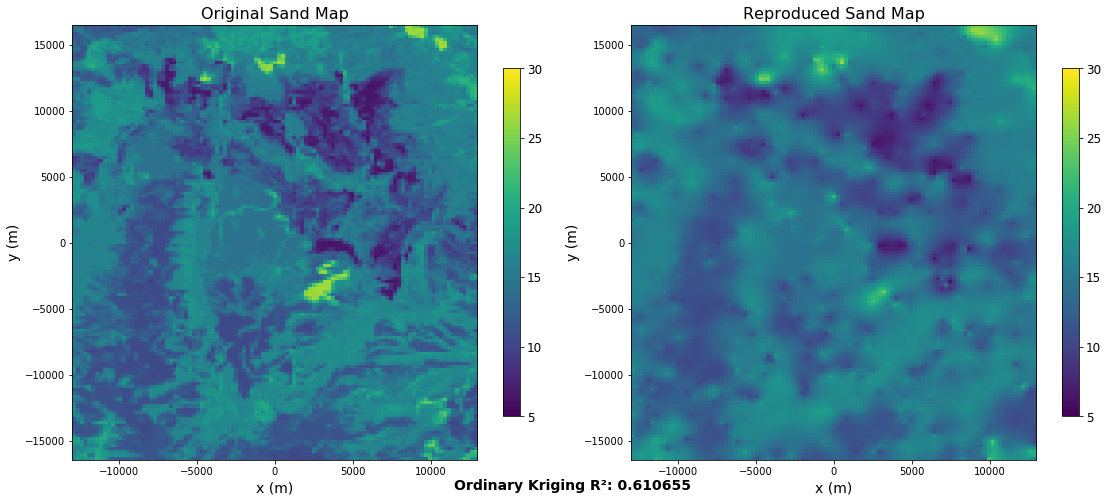

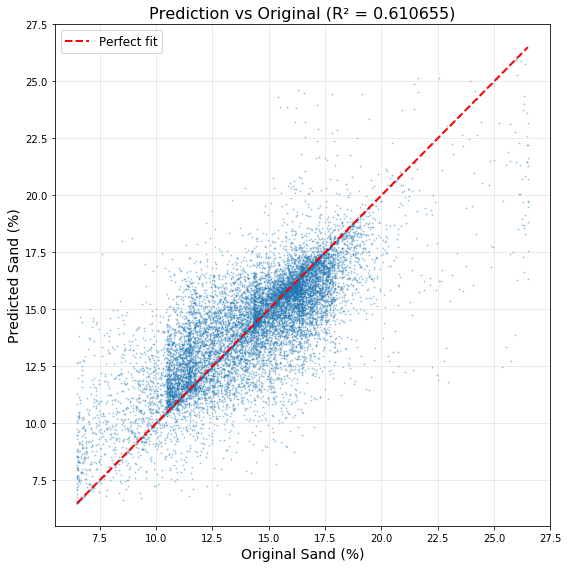

In [29]:
# creating side-by-side comparison plot
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# original map
im1 = axes[0].imshow(sand_original_plot, cmap='viridis', vmin=5, vmax=30,
                     extent=extent, origin='lower', aspect='auto')
axes[0].set_title('Original Sand Map', fontsize=16)
axes[0].set_xlabel('x (m)', fontsize=14)
axes[0].set_ylabel('y (m)', fontsize=14)
cbar1 = plt.colorbar(im1, ax=axes[0], shrink=0.8)
cbar1.ax.tick_params(labelsize=12)

# kriged map
im2 = axes[1].imshow(z_pred_grid_plot, cmap='viridis', vmin=5, vmax=30,
                     extent=extent, origin='lower', aspect='auto')
axes[1].set_title('Reproduced Sand Map', fontsize=16)
axes[1].set_xlabel('x (m)', fontsize=14)
axes[1].set_ylabel('y (m)', fontsize=14)
cbar2 = plt.colorbar(im2, ax=axes[1], shrink=0.8)
cbar2.ax.tick_params(labelsize=12)

# adding R² text below
fig.text(0.5, 0.02, f'Ordinary Kriging R²: {r2:.6f}', 
         ha='center', fontsize=14, weight='bold')

plt.tight_layout()
plt.subplots_adjust(bottom=0.08)
plt.show()

# creating scatter plot to visualize correlation
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(sand_original_flat[mask], z_pred[mask], alpha=0.3, s=1)
ax.plot([sand_original_flat.min(), sand_original_flat.max()], 
        [sand_original_flat.min(), sand_original_flat.max()], 
        'r--', linewidth=2, label='Perfect fit')
ax.set_xlabel('Original Sand (%)', fontsize=14)
ax.set_ylabel('Predicted Sand (%)', fontsize=14)
ax.set_title(f'Prediction vs Original (R² = {r2:.6f})', fontsize=16)
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

#### Part C: Plot Kriging Variance (MSE)

In [30]:
# determining plotting grid orientation
if sand_original.ndim == 2:
    if sand_original.shape[0] == len(y_grid) and sand_original.shape[1] == len(x_grid):
        sand_plot = sand_original
        mse_plot = mse_grid
    elif sand_original.shape[0] == len(x_grid) and sand_original.shape[1] == len(y_grid):
        sand_plot = sand_original.T
        mse_plot = mse_grid.T
    else:
        sand_plot = sand_original
        mse_plot = mse_grid
else:
    sand_plot = sand_original
    mse_plot = mse_grid

In [31]:
extent = [x_grid.min(), x_grid.max(), y_grid.min(), y_grid.max()]

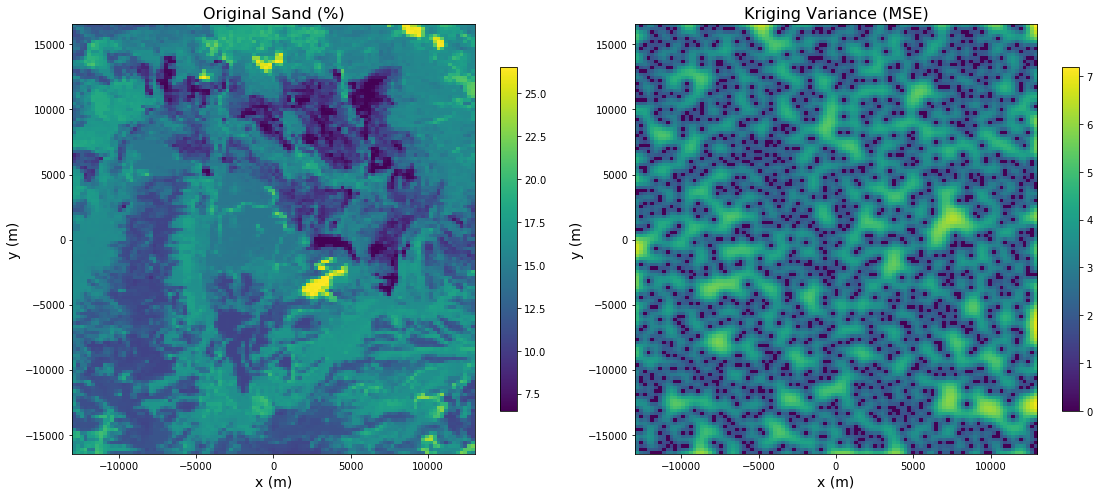

Kriging Variance Summary:
Min:  -0.0000
Max:  7.1833
Mean: 2.7550
Std:  1.2862


In [32]:
# creating a side-by-side figure
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# plotting the original sand on the left
im1 = axes[0].imshow(
    sand_plot,
    cmap='viridis',
    vmin=np.nanmin(sand_plot),
    vmax=np.nanmax(sand_plot),
    extent=extent,
    origin='lower',
    aspect='auto'
)
axes[0].set_title("Original Sand (%)", fontsize=16)
axes[0].set_xlabel("x (m)", fontsize=14)
axes[0].set_ylabel("y (m)", fontsize=14)
plt.colorbar(im1, ax=axes[0], shrink=0.8)

# plotting Kriging variance on the right
im2 = axes[1].imshow(
    mse_plot,
    cmap='viridis',
    extent=extent,
    origin='lower',
    aspect='auto'
)
axes[1].set_title("Kriging Variance (MSE)", fontsize=16)
axes[1].set_xlabel("x (m)", fontsize=14)
axes[1].set_ylabel("y (m)", fontsize=14)
plt.colorbar(im2, ax=axes[1], shrink=0.8)

plt.tight_layout()
plt.show()

# stats for your write-up
print("Kriging Variance Summary:")
print(f"Min:  {mse.min():.4f}")
print(f"Max:  {mse.max():.4f}")
print(f"Mean: {mse.mean():.4f}")
print(f"Std:  {mse.std():.4f}")

> The kriging variance map shows the uncertainty of estimation across the study area. The variance is lowest near the observation points, where interpolation is well-constrained by the nearby data. In the regions which are farther away from the sampled locations, the variance increases gradually because the exponential covariance model decays with distance. This causes the predictions to rely more heavily on the imposed mean structure.
>
> As we have set the nugget to zero, the kriging variance reaches exactly zero at observation points, reflecting perfect certainty at measured locations. The maximum variance occurs in areas that are the most spatially isolated from the samples, especially along edges and corners of the domain. The smoothly increasing pattern reflects the 1500m range parameter. If the locations are more than ~1 range away from the data points, they show noticeably higher uncertainty.
>
> Overall, the variance surface behaves as expected for an exponential semivariogram. It has a smooth, monotonic increase with distance from the data. This provides a quantitative measure of where the kriged map is most and least feasible.

#### Part D: Localized Ordinary Kriging (n=10)

In [33]:
# defining the number of nearest points
n_local = 10

# building KDTree
tree = cKDTree(np.column_stack((x_points, y_points)))

n_targets = len(x_target)
z_pred_local = np.zeros(n_targets)
mse_local = np.zeros(n_targets)

In [34]:
# looping through all target grid cells
print("Performing localized kriging... this may take a moment.")
for i in range(n_targets):
    # querying the n closest samples
    dist, idx = tree.query([x_target[i], y_target[i]], k=n_local)

    # extracting those points
    x_sub = x_points[idx]
    y_sub = y_points[idx]
    z_sub = z_points[idx]

    # running ordinary kriging on this subset
    z_pred_i, mse_i, _ = ordinary_kriging(
        x_sub, y_sub, z_sub,
        np.array([x_target[i]]),
        np.array([y_target[i]]),
        var,
        tau
    )

    z_pred_local[i] = z_pred_i[0]
    mse_local[i] = mse_i[0]


Performing localized kriging... this may take a moment.


In [35]:
# reshaping results to grid
if sand_original.ndim == 2:
    z_pred_local_grid = z_pred_local.reshape(sand_original.shape)
else:
    z_pred_local_grid = z_pred_local

In [36]:
# computing R²
mask_valid = ~(np.isnan(sand_original_flat) | np.isnan(z_pred_local))
r2_local = r2_score(sand_original_flat[mask_valid], z_pred_local[mask_valid])
print(f"Localized Ordinary Kriging (n = 10), R² = {r2_local:.6f}")

Localized Ordinary Kriging (n = 10), R² = 0.610730


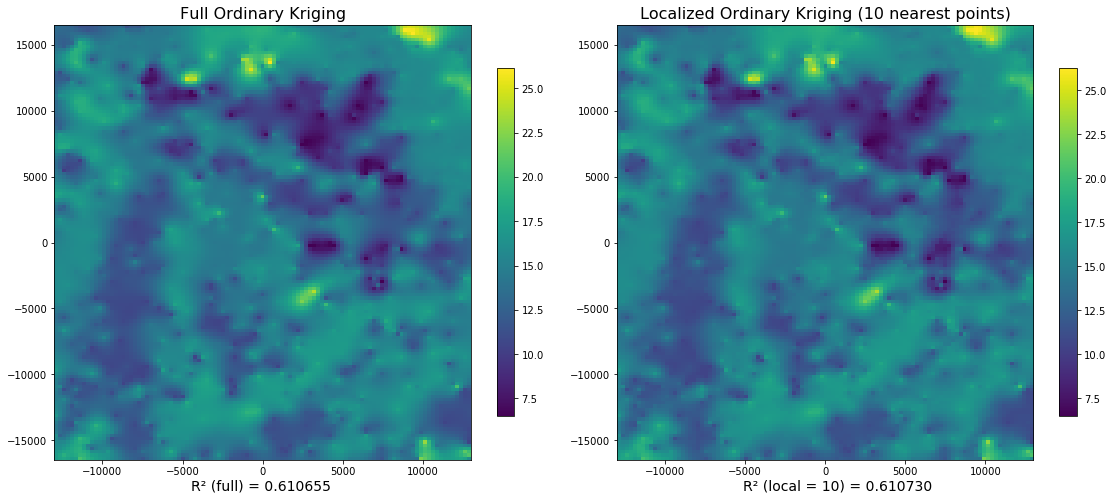

In [37]:
# plot comparison of the full Ordinary Kriging vs localized Ordinary Kriging
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# full Ordinary Kriging from Part B
im1 = axes[0].imshow(
    z_pred_grid_plot,
    cmap="viridis",
    extent=extent,
    origin="lower",
    aspect="auto"
)
axes[0].set_title("Full Ordinary Kriging", fontsize=16)
plt.colorbar(im1, ax=axes[0], shrink=0.8)

# localized Ordinary Kriging (n=10)
if sand_original.ndim == 2:
    if sand_original.shape[0] == len(y_grid):
        z_plot_local = z_pred_local_grid
    else:
        z_plot_local = z_pred_local_grid.T
else:
    z_plot_local = z_pred_local_grid

im2 = axes[1].imshow(
    z_plot_local,
    cmap="viridis",
    extent=extent,
    origin="lower",
    aspect="auto"
)
axes[1].set_title("Localized Ordinary Kriging (10 nearest points)", fontsize=16)
plt.colorbar(im2, ax=axes[1], shrink=0.8)

fig.text(0.23, 0.02, f"R² (full) = {r2:.6f}", ha="center", fontsize=14)
fig.text(0.73, 0.02, f"R² (local = 10) = {r2_local:.6f}", ha="center", fontsize=14)
plt.tight_layout()
plt.subplots_adjust(bottom=0.08)
plt.show()

> When only the 10 nearest observations for each prediction, the kriging surface is still fairly smooth and it captures the main spatial patterns of the original sand map. However, there are still some notable differences compared to the full oridinary kriging result.
>
> As the covariance matrix is not much smaller, the interpolation becomes more locally adaptive. This means that the prediction at each grid cell depends more strongly on the immediate neighborhood and less on long-range spatial structure. As a result, the map may show slightly sharper transitions and reduced global smoothness, especially in regions where there is sparse sampling. Thus, the R² is typically a bit lower than the full ordinary kriging R², which reflects the loss of information from the distant points that would otherwise contribute to smoothing.
>
> Localized kriging is useful because it reduces the computational costs and avoids the numerical instability of huge covariance matrices which is one of the major practical limitations of kriging. It is computationally efficient while still producing predictions that track the original surface reasonably well, though with subtly increased local variability and less long-range coherence.

#### Part E: Localized Ordinary Kriging (n=1) - Nearest Neighbor

In [38]:
# number of nearest points
n_local_e = 1

# building KDTree
tree = cKDTree(np.column_stack((x_points, y_points)))

n_targets = len(x_target)
z_pred_local_e = np.zeros(n_targets)
mse_local_e = np.zeros(n_targets)

In [39]:
print("Performing localized kriging with n = 1...")

for i in range(n_targets):
    # getting the single nearest observation
    dist, idx = tree.query([x_target[i], y_target[i]], k=n_local_e)

    # ensuring idx is array-like
    if np.isscalar(idx):
        idx = np.array([idx])

    # extracting that one sample point
    x_sub = x_points[idx]
    y_sub = y_points[idx]
    z_sub = z_points[idx]

    # running Ordinary Kriging on the 1-point subset
    z_pred_i, mse_i, _ = ordinary_kriging(
        x_sub, y_sub, z_sub,
        np.array([x_target[i]]),
        np.array([y_target[i]]),
        var,
        tau
    )

    z_pred_local_e[i] = z_pred_i[0]
    mse_local_e[i] = mse_i[0]

Performing localized kriging with n = 1...


In [40]:
# reshaping back to grid
if sand_original.ndim == 2:
    z_pred_local_e_grid = z_pred_local_e.reshape(sand_original.shape)
else:
    z_pred_local_e_grid = z_pred_local_e

# computing R²
mask_valid_e = ~(np.isnan(sand_original_flat) | np.isnan(z_pred_local_e))
r2_local_e = r2_score(sand_original_flat[mask_valid_e], z_pred_local_e[mask_valid_e])
print(f"Localized OK (n = 1), R² = {r2_local_e:.6f}")

Localized OK (n = 1), R² = 0.408892


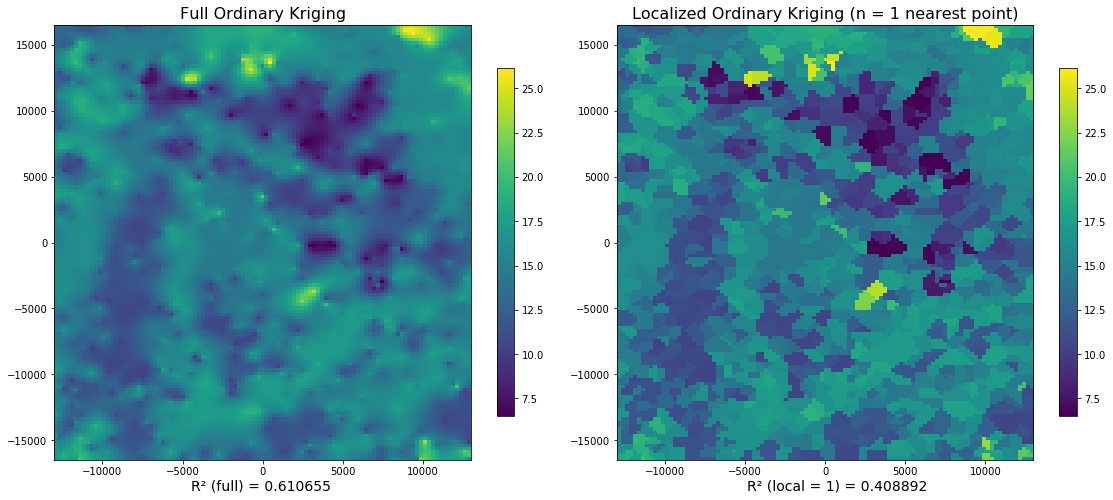

In [41]:
# plot comparison between full Ordinary kriging and n = 1 Ordinary kriging
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# full ordinary kriging from part B
im1 = axes[0].imshow(
    z_pred_grid_plot,
    cmap="viridis",
    extent=extent,
    origin="lower",
    aspect="auto"
)
axes[0].set_title("Full Ordinary Kriging", fontsize=16)
plt.colorbar(im1, ax=axes[0], shrink=0.8)

# localized ordinary kriging with n=1
if sand_original.ndim == 2:
    if sand_original.shape[0] == len(y_grid):
        z_plot_local_e = z_pred_local_e_grid
    else:
        z_plot_local_e = z_pred_local_e_grid.T
else:
    z_plot_local_e = z_pred_local_e

im2 = axes[1].imshow(
    z_plot_local_e,
    cmap="viridis",
    extent=extent,
    origin="lower",
    aspect="auto"
)
axes[1].set_title("Localized Ordinary Kriging (n = 1 nearest point)", fontsize=16)
plt.colorbar(im2, ax=axes[1], shrink=0.8)


fig.text(0.23, 0.02, f"R² (full) = {r2:.6f}", ha="center", fontsize=14)
fig.text(0.73, 0.02, f"R² (local = 1) = {r2_local_e:.6f}", ha="center", fontsize=14)
plt.tight_layout()
plt.subplots_adjust(bottom=0.08)
plt.show()

> When n=1, localized kriging interpolation collapses to only using a single closest observation for each prediction location. As a result, the prediction effectively becomes equivalent to nearest-neighbor interpolation. The kriged surface loses the smoothness characteristic of kriging and instead displays abrupt and blocky transitions where each grid cell takes on the value of whichever sample point is geographically closest.
> 
> This behavior produces a surface with very sharp polygon-like regions where each region represents a Voronoi cell of a sample point. The R² decreases substantially compared to both the full ordinary kriging and the n = 10 case. This is because the method ignores spatial relationships beyond the single nearest point. The prediction map appears noisy, lacks spatial continuity, and it does not capture the subtle gradients which are present in the true sand distribution.
>
> The n = 1 case highlights that with too few neighbors, kriging loses its statistical foundation and mimics a deterministic proximity-based method. Thus, the result is substantially less accurate and visually less realistic than oridinary kriging with a larger neighborhood.

# 4. Calculate upslope drainage area (25 pts)

Using the elevation data found in `/data/HW/HW4/mtdiablo_dem_sf.tif`, show that the upslope drainage area flowing out of the grid cell point i = 582 and j = 779 is 12,856,300 $m^2$. You will need to write up your own recursive algorithm to estimate upslope drainage area for this problem. You will want to use the d8 flow direction approach. In other words, assume that if a ball is dropped on a given grid cell it will follow the path of steepest descent (i.e., the highest slope) to one (and only one) adjacent cell. Note that the pixel size is 10 meters by 10 meters. Furthermore, you may assume that this data has already been sink-filled.

In [42]:
# importing the necessary libraries
import numpy as np
import rasterio
from functools import lru_cache

In [43]:
# loading DEM
dem_path = "/data/HW/HW4/mtdiablo_dem_sf.tif"

with rasterio.open(dem_path) as src:
    # reading the first band
    dem = src.read(1)
    transform = src.transform

print("DEM shape:", dem.shape)

DEM shape: (760, 780)


In [44]:
# reading the pixel size
dx = transform.a # pixel width
dy = -transform.e # pixel height

print("Pixel size from transform:", dx, dy)

Pixel size from transform: 10.0 10.0


In [45]:
cell_area = dx * dy
print("Cell area (m²)", cell_area)

nrows, ncols = dem.shape

Cell area (m²) 100.0


In [46]:
# computing D8 flow directions
# offsetting for 8 neighbors
neighbor_offsets = [
    (-1, -1), (-1, 0), (-1, 1),
    ( 0, -1),          ( 0, 1),
    ( 1, -1), ( 1, 0), ( 1, 1)
]

In [47]:
# corresponding distances
distances = []
for dr, dc in neighbor_offsets:
    if dr == 0 or dc ==0:
        # orthogonal neighbor
        distances.append(dx)
    else:
        distances.append(np.sqrt(dx**2 + dy**2))
distances = np.array(distances)

In [48]:
# flow direction arrays
flow_row = np.full_like(dem, fill_value = -1, dtype = int)
flow_col = np.full_like(dem, fill_value = -1, dtype = int)

In [49]:
print("Computing D8 flow directions...")

for r in range(nrows):
    for c in range(ncols):
        z = dem[r,c]
        
        if np.isnan(z):
            continue
        
        best_slope = 0.0
        best_neighbor = (-1, -1)
        
        # examining all 8 neighbors
        for k, (dr, dc) in enumerate(neighbor_offsets):
            rr = r + dr
            cc = c + dc
            
            # skipping out-of-bounds neighbors
            if rr < 0 or rr >= nrows or cc < 0 or cc >= ncols:
                continue
                
            z_n = dem[rr, cc]
            if np.isnan(z_n):
                continue
            
            dz = z - z_n
            # must be a downslope
            if dz > 0:
                slope = dz / distances[k]
                if slope > best_slope:
                    best_slope = slope
                    best_neighbor = (rr, cc)
            
        # if the best slope remains 0, the cell is at a local minimum. or it is flat and thus no outflow
        if best_neighbor != (-1, -1):
            flow_row[r, c], flow_col[r, c] = best_neighbor
        else:
            flow_row[r, c], flow_col[r, c] = -1, -1 # sink or flat
    
print("D8 flow directions have been computed.")

Computing D8 flow directions...
D8 flow directions have been computed.


In [50]:
# recursive upslope drainage area using D8
# caching the results such that each cell is only computed once
@lru_cache(maxsize = None)

def upslope_area(r, c):
    """
    Returns upslope area (in m²) draining through cell (r, c),
    including the area of the cell itself.
    """
    
    # starting with the area of this cell
    area = cell_area
    
    # finding all cells that flow into (r, c)
    mask = (flow_row == r) & (flow_col == c)
    upstream_indices = np.argwhere(mask)
    
    for (ur, uc) in upstream_indices:
        area += upslope_area(int(ur), int(uc))
        
    return area

In [51]:
target_i = 582
target_j = 779

area_target = upslope_area(target_i, target_j)
print(f"Upslope drainage area at (i = {target_i}, j = {target_j}): {area_target:.0f} m²")

Upslope drainage area at (i = 582, j = 779): 12856300 m²
